<a href="https://colab.research.google.com/github/whileds/YatraLink/blob/main/creditcard_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [ ]:
df.shape
df.info()
df['Class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

,count
Class,
0.0,21791
1.0,86


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape
y.shape


(21878,)

In [ ]:
df['Class'].isna().sum()


np.int64(1)

In [ ]:
df = df.dropna(subset=['Class'])


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
df['Class'].isna().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
y_train.value_counts()


,count
Class,
0.0,17432
1.0,69


In [ ]:
y_train_smote.value_counts()



,count
Class,
0.0,17432
1.0,17432


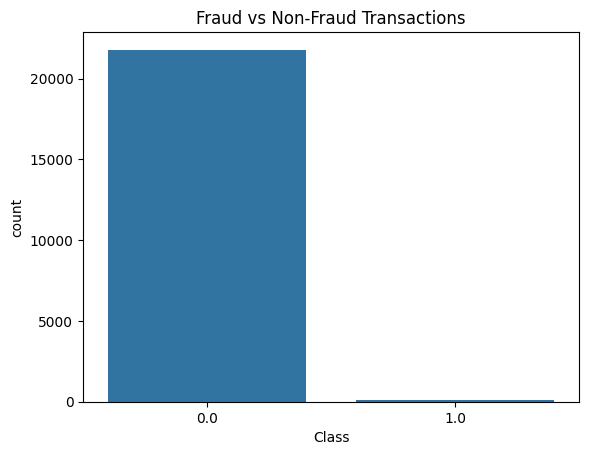

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


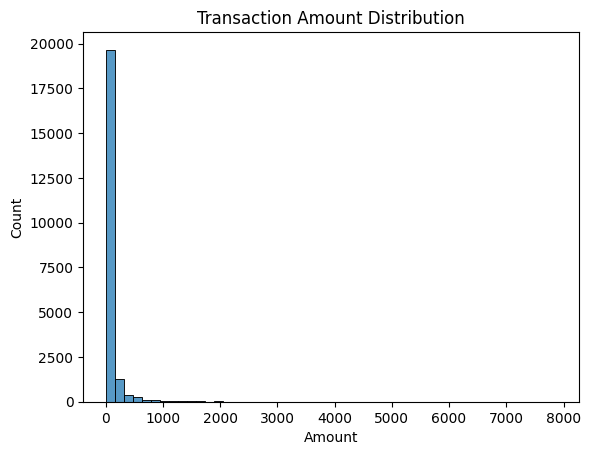

In [ ]:
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


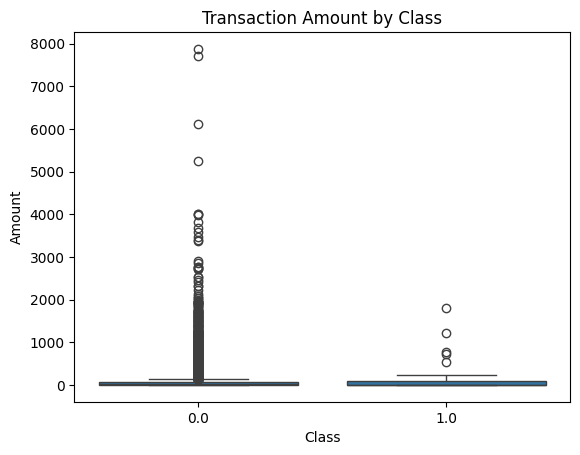

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression(max_iter=3000)


In [ ]:
model.fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4359
         1.0       0.29      1.00      0.45        17

    accuracy                           0.99      4376
   macro avg       0.65      1.00      0.72      4376
weighted avg       1.00      0.99      0.99      4376



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[4318,   41],
       [   0,   17]])

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

roc_auc


np.float64(0.9985155796661404)

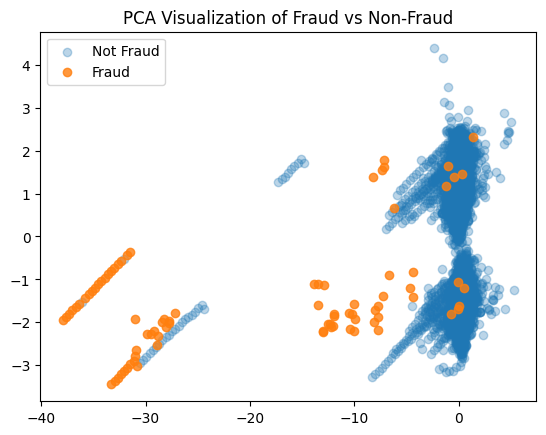

In [ ]:
  from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Not Fraud', alpha=0.3)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Fraud', alpha=0.8)

plt.legend()
plt.title("PCA Visualization of Fraud vs Non-Fraud")
plt.show()
